# 07_기계학습_4 텍스트마이닝(데이터에듀 모의고사).

# 모의고사 1
- "영화 기생충_review.txt" : review 데이터
- "영화 기생충_사전.txt" : 출연진 이름, 극중 이름, 감독 이름

## '영화 기생충_review.txt' 데이터를 읽어온 뒤 숫자, 특수문자 등을 제거하는 전처리 작업을 시행하시오. 그리고 '영화 기생충_review.txt'를 사전에 등록하시오.

### 데이터 로딩

In [509]:
file = open('data/영화 기생충_review.txt', 'r', encoding='cp949')
line = file.read()

In [510]:
line = line.split('\n')

In [511]:
import pandas as pd

review = pd.Series(line)

In [512]:
review.shape

(1791,)

In [513]:
review[:10]

0                             별1개  준 사람들은   나베당임
1                                             역쉬
2         영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다..
3    지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음.  Bomb!!!
4                           대단한 영화. 몰입력 장난아님. 후아
5                                             그닥
6                                      칸하고 안맞나봄.
7                           봉준호식의 코메디와 사회비판 페이소스
8                                          좋았습니다
9      군더더기 없이 깔끔한 영화, 지금도 영화가 주는 메세지를 생각하는 중입니다
dtype: object

### 클렌징 : 숫자, 특수문자 제거

In [514]:
import re

review = review.map(lambda x: re.sub(r"\d", " ", x))
review = review.map(lambda x: re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》;]', ' ', x))
review

0                                별 개  준 사람들은   나베당임
1                                                역쉬
2            영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다  
3       지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음   Bomb   
4                              대단한 영화  몰입력 장난아님  후아
                           ...                     
1786                            와 내 앞으로도  명이나 있네   
1787                          좌파폭도고발영화 전라도까는 내용이었어 
1788                          언제나 기대되는 봉준호감독의 영화   
1789                            이번에도 매우 매우 기대됩니다   
1790                                               
Length: 1791, dtype: object

In [515]:
# 공백은 사전 돌릴 때 에러나서 미리 지워줌
review = review[review != ' ']
review = review[review != '  ']
review = review[review != '   ']
review = review[review != '    ']

### 사전 로딩, 사전 등록

In [517]:
dic = pd.read_csv('data/영화 기생충_사전.txt', encoding='cp949',sep='\t', names=['word'])
dic.head()

,word
0,기생충
1,봉준호
2,송강호
3,기택
4,이선균


**품사표**<br>
명사NN<br>
일반명사NNG<br>
고유명사NNP<br>
의존명사NNB<br>
동사VV<br>
형용사VA<br>
부사MA

In [518]:
dic['pos'] = 'NNP'

In [519]:
dic.head()

,word,pos
0,기생충,NNP
1,봉준호,NNP
2,송강호,NNP
3,기택,NNP
4,이선균,NNP


In [520]:
dic.to_csv('data/기생충사전.txt',  sep='\t', index=False, header=False)

In [521]:
from konlpy.tag import Komoran
komoran = Komoran(userdic='data/기생충사전.txt')

## '영화 기생충_사전.txt'를 단어 사전으로 하는 TDM을 구축하고 빈도를 파악하고 시각화 하시오.

In [522]:
# 벡터화 인스턴스 생성
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# 사전으로 fit
cv.fit(dic['word'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [523]:
# 문서로 tdm 생성
cv_matrix = cv.transform(review)

In [524]:
name = cv.get_feature_names()
cv_mat = cv_matrix.toarray()
tdm = pd.DataFrame(cv_mat, columns = name)

In [525]:
# 빈도 계산
tdm_freq = tdm.sum(axis=0).sort_values(ascending=False)

In [526]:
# 시각화 - 한글 깨짐 방지
from matplotlib import font_manager, rc

path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

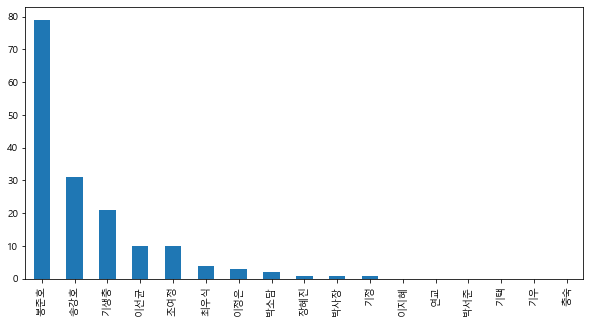

In [527]:
# 시각화
tdm_freq.plot(kind = 'bar', figsize=(10,5))
plt.show()

## extraNoun으로 명사를 추출하여 워드클라우드를 그리고 특성을 파악하시오.

In [528]:
nouns = komoran.nouns(' '.join(review))

In [529]:
import collections

freq = collections.Counter(nouns)

In [530]:
freq2 = pd.DataFrame(dict(word=freq.keys(), frequency = freq.values())).sort_values('frequency', ascending=False).head(20)

In [531]:
# 2음절 이상만 추리기
freq2 = freq2.loc[freq2['word'].map(lambda x : len(x)>=2),:]

- 워드클라우드는 그냥 MS워드로 폰트크기로 그려서 붙이기

# 모의고사 2

## '연설문.txt' 데이터를 읽어온 뒤 숫자, 특수 문자 등을 제거하는 전처리 작업을 시행하시오.

In [241]:
data = pd.read_csv('data/연설문.txt', sep='\n', encoding='cp949', names = ['sentence'])

In [243]:
data.head()

,sentence
0,"존경하고 사랑하는 국민 여러분, 감사합니다."
1,국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다. 저는 오늘 대한민국 제1...
2,우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이...
3,함께 선거를 치른 후보들께 감사의 말씀과 심심한 위로를 전합니다. 이번 선거에서는 ...
4,"존경하는 국민 여러분,"


In [255]:
import re
data.fillna(' ')
data['sentence'] = data['sentence'].apply(lambda x : re.sub(r'\d+',' ', x))
data['sentence'] = data['sentence'].apply(lambda x : re.sub(r'[-+=,#/\?:^$.@*\"~&%!\\|;\(\)\[\]\<\>\']',' ', x))
data['sentence'] = data['sentence'].apply(lambda x : x.lower())

## 전처리된 데이터에서 명사를 추출하고 명사의 출현빈도를 10위까지 추출하여 막대그래프로 시각화하시오

In [268]:
one = ' '.join(data['sentence'].tolist())

In [269]:
from konlpy.tag import Komoran
komoran = Komoran()
freq = komoran.nouns(one)

In [270]:
freq[:10]

['존경', '사랑', '국민', '여러분', '감사', '국민', '선택', '머리', '감사', '오늘']

In [271]:
import collections

freq_cnt = collections.Counter(freq)

In [287]:
freq_cnt2 = dict(freq_cnt)
word = freq_cnt2.keys()
word_freq = freq_cnt2.values()
freq_mat=pd.DataFrame(dict(word=word, word_freq = word_freq))

In [289]:
freq_mat.head()

,word,word_freq
0,존경,3
1,사랑,2
2,국민,19
3,여러분,3
4,감사,3


In [293]:
freq_mat = freq_mat[freq_mat['word'].map(lambda x : len(x)>=2)].sort_values('word_freq',ascending=False)
freq_mat.head(10)

,word,word_freq
2,국민,19
10,대통령,15
8,대한민국,8
18,나라,6
54,정치,4
7,오늘,4
6,머리,3
33,역사,3
4,감사,3
123,평화,3


In [294]:
freq_top10 = freq_mat.head(10)

In [305]:
freq_top10 = freq_top10.set_index(freq_top10['word'])

<AxesSubplot:xlabel='word'>

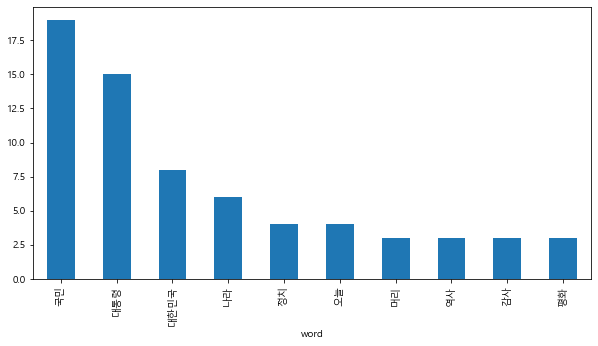

In [307]:
freq_top10['word_freq'].plot(kind='bar', figsize=(10,5))

## 전처리된 데이터를 이용해 워드클라우드를 작성하고 인사이트를 추출하시오

# 모의고사 3

## '공구 블로그 댓글.txt' 파일을 읽어 들여 숫자, 특수 문자 등을 제거하는 전처리 작업을 시행하시오.

In [532]:
import pandas as pd

data = pd.read_csv('data/공구 블로그 댓글.txt', sep='\t', encoding='cp949')

In [533]:
data

,Date,Good,Hate,Content
0,2014.02.14\t,71,0,두두월드님.담번엔 실리콘스티머공구도부탁요.
1,2014.02.14\t,118,0,김다미돈까스 공구 일정 궁금해요
2,2014.02.14\t,42,0,빌보나 헹켈 커트러리요~
3,2014.02.14\t,84,0,드롱기 아이코다 빈티지 공구 부탁드려요..ㅠㅠ
4,2014.02.14\t,145,0,폴란드그릇 다른패턴으로공구희망유
...,...,...,...,...
220,2014.01.15\t,123,0,앵무새 유기농 설탕욤~~
221,2014.01.15\t,53,0,오일은 공구 안하시나요?
222,2014.01.15\t,27,0,넬리 공구 안해용????
223,2014.01.15\t,87,0,혹시 떡은 ?


In [534]:
import re

data['Date'] = data['Date'].map(lambda x: re.sub('\t','',x))

data['Date'] = pd.to_datetime(data['Date'])

data['Content'] = data['Content'].fillna(' ')
data['Content'] = data['Content'].map(lambda x : re.sub(r'\d+', ' ', x))
data['Content'] = data['Content'].map(lambda x : re.sub(r'[-=+,#/\?:^$.@*\"~&%!;\\|\(\)\[\]\<\>\']',' ', x))

In [535]:
data

,Date,Good,Hate,Content
0,2014-02-14,71,0,두두월드님 담번엔 실리콘스티머공구도부탁요
1,2014-02-14,118,0,김다미돈까스 공구 일정 궁금해요
2,2014-02-14,42,0,빌보나 헹켈 커트러리요
3,2014-02-14,84,0,드롱기 아이코다 빈티지 공구 부탁드려요 ㅠㅠ
4,2014-02-14,145,0,폴란드그릇 다른패턴으로공구희망유
...,...,...,...,...
220,2014-01-15,123,0,앵무새 유기농 설탕욤
221,2014-01-15,53,0,오일은 공구 안하시나요
222,2014-01-15,27,0,넬리 공구 안해용
223,2014-01-15,87,0,혹시 떡은


## '사전.txt'를 사전에 추가하고 문서에서 형용사를 추출하여라.

In [536]:
dictionary = pd.read_csv('data/사전.txt', encoding='cp949', names=['word'])

In [537]:
dictionary.head()

,word
0,공구
1,실리콘스티머
2,김다미돈까스
3,빌보
4,헹켈


In [538]:
dictionary['pos'] = 'NNP'

In [539]:
dictionary.to_csv('data/new_사전.txt',  sep='\t',index=False, header=False)

In [540]:
from konlpy.tag import Komoran
komoran = Komoran(userdic='data/new_사전.txt')

In [541]:
pos = komoran.pos(' '.join(data['Content']))
pos[:10]

[('두두', 'NNP'),
 ('월드', 'NNP'),
 ('님', 'XSN'),
 ('담', 'NNG'),
 ('번', 'NNB'),
 ('에', 'JKB'),
 ('ㄴ', 'JX'),
 ('실리콘스티머', 'NNP'),
 ('공구', 'NNP'),
 ('도', 'NNG')]

In [542]:
adj = []
for i in pos:
    if i[1] == 'VA':
        adj.append(i[0])

In [543]:
adj

['같', '없', '시', '편하', '없', '없', '맛있', '크', '시', '어렵', '없', '어떻']

## 2월에 게시된 댓글의 명사를 추출하고 빈도수를 시각화하시오.

In [544]:
data = data.set_index('Date')
data = data.sort_index()
data.head()

,Good,Hate,Content
Date,,,
2014-01-15,0,0,궁물맛이 찌게맛이 끈내주는건 스타우브던디
2014-01-15,392,1,주름 좀 없애볼까
2014-01-15,76,0,조마루감자탕 간장뼈찜에 요거요거 딱 한잔 어때
2014-01-15,87,0,혹시 떡은
2014-01-15,53,0,오일은 공구 안하시나요


In [545]:
data.tail()

,Good,Hate,Content
Date,,,
2014-02-14,145,0,폴란드그릇 다른패턴으로공구희망유
2014-02-14,84,0,드롱기 아이코다 빈티지 공구 부탁드려요 ㅠㅠ
2014-02-14,42,0,빌보나 헹켈 커트러리요
2014-02-14,118,0,김다미돈까스 공구 일정 궁금해요
2014-02-14,71,0,두두월드님 담번엔 실리콘스티머공구도부탁요


In [546]:
data2 = data.loc['2014-02-01':]

In [547]:
nouns = komoran.nouns(' '.join(data2['Content']))

In [548]:
import collections

freq = collections.Counter(nouns)

In [550]:
name = dict(freq).keys()
cnt = dict(freq).values()
freq = pd.DataFrame(dict(name = name, cnt=cnt)).sort_values('cnt', ascending=False)
freq.head()

,name,cnt
1,공구,58
5,해주,27
6,세,26
24,부탁,10
32,빌보,9


In [551]:
freq2 = freq[freq['name'].map(lambda x : len(x) >=2)]

In [552]:
freq2 = freq2.head(5)

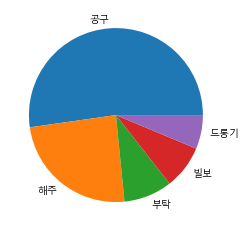

In [553]:
plt.pie(freq2['cnt'], labels = freq2['name'])
plt.show()

# 모의고사 4

## 'instagram_태교여행.txt' 데이터를 읽어온 뒤 숫자, 특수 문자 등을 제거하는 전처리 작업을 시행 하시오.

In [462]:
data = pd.read_csv('data/instagram_태교여행.txt', sep='\t', encoding='cp949', names=['Content'])

In [465]:
import re

data['Content'] = data['Content'].fillna(' ')
data['Content'] = data['Content'].map(lambda x : re.sub(r'\d+', ' ', x))
data['Content'] = data['Content'].map(lambda x : re.sub(r'[-=+,#/\?:^$.@*\"~&%!\\|\(\)\[\]\<\>\';]', ' ', x))

## 전처리된 데이터에서 '태교여행'이란 단어를 사전에 추가하고 명사를 추출해 출현빈도 10위까지 막대그래프로 시각화하시오.

In [466]:
dictionary = pd.DataFrame({'word':['태교여행'], 'cnt':['NNP']})
dictionary.to_csv('data/태교여행사전.txt', sep='\t', index=False, header=False)

In [467]:
dictionary

,word,cnt
0,태교여행,NNP


In [468]:
from konlpy.tag import Komoran
komoran = Komoran(userdic='data/태교여행사전.txt')

In [469]:
nouns = komoran.nouns(' '.join(data['Content']))

In [470]:
import collections

freq = collections.Counter(nouns)

In [471]:
freq2 = dict(freq)
name = freq2.keys()
cnt = freq2.values()
freq3 = pd.DataFrame(dict(name=name, cnt=cnt))
freq4 = freq3[freq3['name'].map(lambda x: len(x)>=2)]
freq4 = freq4.sort_values('cnt', ascending=False)
freq5 = freq4.head(10)

In [472]:
freq5

,name,cnt
4,태교여행,216
29,여행,202
57,그램,113
56,스타,89
19,임산부,64
44,제주,39
2,예비,36
106,만삭,32
39,부부,31
52,제주도,30


<BarContainer object of 10 artists>

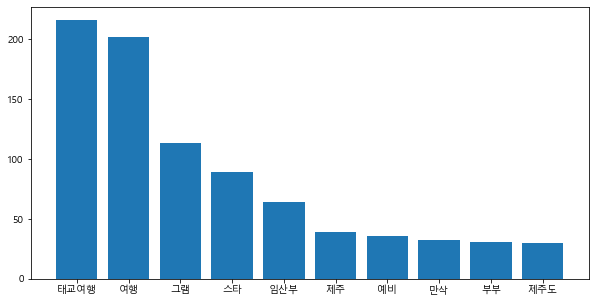

In [477]:
plt.figure(figsize=(10,5))
plt.bar(freq5['name'], freq5['cnt'])


## 전처리된 데이터를 이용해 워드클라우드를 작성하고 인사이트를 추출하시오.

In [480]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [505]:
freq4 = freq4.reset_index(drop=True)
freq4 = freq4[freq4['cnt']>=20]

In [506]:
text = {}
for i in range(len(freq4)):
    text[freq4['name'][i]] = freq4['cnt'][i]

In [507]:
# Generate a word cloud image
font_path = 'c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(max_font_size=100, 
                     font_path=font_path).generate_from_frequencies(text)

(-0.5, 399.5, 199.5, -0.5)

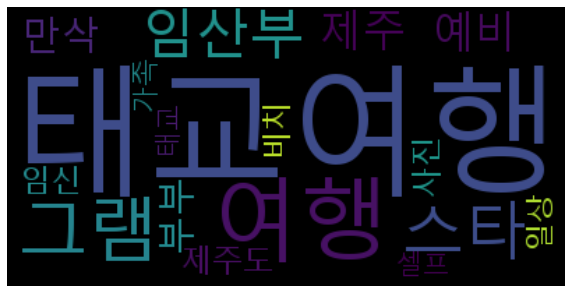

In [508]:
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')